In [75]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [76]:
x1 = np.array([[[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [19.97860112, 19.97860112, 19.97860112, 19.97860112,
         19.97860112],
        [19.33123134, 19.33123134, 19.33123134, 19.33123134,
         19.33123134],
        [19.39072735, 19.39072735, 19.39072735, 19.39072735,
         19.39072735],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]],

       [[ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [18.76187137, 18.76187137, 18.76187137, 18.76187137,
         18.76187137],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [18.72960466, 18.72960466, 18.72960466, 18.72960466,
         18.72960466],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ]],

       [[20.4378904 , 20.4378904 , 20.4378904 , 20.4378904 ,
         20.4378904 ],
        [18.58426087, 18.58426087, 18.58426087, 18.58426087,
         18.58426087],
        [18.58663278, 18.58663278, 18.58663278, 18.58663278,
         18.58663278],
        [18.54354387, 18.54354387, 18.54354387, 18.54354387,
         18.54354387],
        [18.26092151, 18.26092151, 18.26092151, 18.26092151,
         18.26092151],
        [18.21167599, 18.21167599, 18.21167599, 18.21167599,
         18.21167599],
        [18.30072167, 18.30072167, 18.30072167, 18.30072167,
         18.30072167],
        [18.67486   , 18.67486   , 18.67486   , 18.67486   ,
         18.67486   ],
        [19.1479981 , 19.1479981 , 19.1479981 , 19.1479981 ,
         19.1479981 ]],

       [[18.9319623 , 18.9319623 , 18.9319623 , 18.9319623 ,
         18.9319623 ],
        [18.66988187, 18.66988187, 18.66988187, 18.66988187,
         18.66988187],
        [18.50511931, 18.50511931, 18.50511931, 18.50511931,
         18.50511931],
        [18.54365086, 18.54365086, 18.54365086, 18.54365086,
         18.54365086],
        [17.70723004, 17.70723004, 17.70723004, 17.70723004,
         17.70723004],
        [18.01098183, 18.01098183, 18.01098183, 18.01098183,
         18.01098183],
        [17.9494986 , 17.9494986 , 17.9494986 , 17.9494986 ,
         17.9494986 ],
        [18.3418473 , 18.3418473 , 18.3418473 , 18.3418473 ,
         18.3418473 ],
        [18.98542013, 18.98542013, 18.98542013, 18.98542013,
         18.98542013]],

       [[18.91765203, 18.91765203, 18.91765203, 18.91765203,
         18.91765203],
        [18.31130936, 18.31130936, 18.31130936, 18.31130936,
         18.31130936],
        [18.03837971, 18.03837971, 18.03837971, 18.03837971,
         18.03837971],
        [17.67997513, 17.67997513, 17.67997513, 17.67997513,
         17.67997513],
        [18.09132819, 18.09132819, 18.09132819, 18.09132819,
         18.09132819],
        [17.41347356, 17.41347356, 17.41347356, 17.41347356,
         17.41347356],
        [17.76311315, 17.76311315, 17.76311315, 17.76311315,
         17.76311315],
        [18.36409337, 18.36409337, 18.36409337, 18.36409337,
         18.36409337],
        [18.77965083, 18.77965083, 18.77965083, 18.77965083,
         18.77965083]],

       [[18.43610427, 18.43610427, 18.43610427, 18.43610427,
         18.43610427],
        [17.93022391, 17.93022391, 17.93022391, 17.93022391,
         17.93022391],
        [17.92709198, 17.92709198, 17.92709198, 17.92709198,
         17.92709198],
        [17.5667125 , 17.5667125 , 17.5667125 , 17.5667125 ,
         17.5667125 ],
        [18.01634562, 18.01634562, 18.01634562, 18.01634562,
         18.01634562],
        [17.89096302, 17.89096302, 17.89096302, 17.89096302,
         17.89096302],
        [17.7746547 , 17.7746547 , 17.7746547 , 17.7746547 ,
         17.7746547 ],
        [18.28260195, 18.28260195, 18.28260195, 18.28260195,
         18.28260195],
        [18.66472214, 18.66472214, 18.66472214, 18.66472214,
         18.66472214]],

       [[18.43666239, 18.43666239, 18.43666239, 18.43666239,
         18.43666239],
        [18.43901078, 18.43901078, 18.43901078, 18.43901078,
         18.43901078],
        [17.92415999, 17.92415999, 17.92415999, 17.92415999,
         17.92415999],
        [18.05219343, 18.05219343, 18.05219343, 18.05219343,
         18.05219343],
        [18.08936833, 18.08936833, 18.08936833, 18.08936833,
         18.08936833],
        [18.07768723, 18.07768723, 18.07768723, 18.07768723,
         18.07768723],
        [18.12424964, 18.12424964, 18.12424964, 18.12424964,
         18.12424964],
        [18.73086616, 18.73086616, 18.73086616, 18.73086616,
         18.73086616],
        [18.99384718, 18.99384718, 18.99384718, 18.99384718,
         18.99384718]],

       [[18.7167203 , 18.7167203 , 18.7167203 , 18.7167203 ,
         18.7167203 ],
        [18.70643584, 18.70643584, 18.70643584, 18.70643584,
         18.70643584],
        [18.7013765 , 18.7013765 , 18.7013765 , 18.7013765 ,
         18.7013765 ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [18.28044268, 18.28044268, 18.28044268, 18.28044268,
         18.28044268],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [18.62217101, 18.62217101, 18.62217101, 18.62217101,
         18.62217101],
        [18.93186344, 18.93186344, 18.93186344, 18.93186344,
         18.93186344],
        [19.13004182, 19.13004182, 19.13004182, 19.13004182,
         19.13004182]],

       [[18.71521135, 18.71521135, 18.71521135, 18.71521135,
         18.71521135],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [18.71572026, 18.71572026, 18.71572026, 18.71572026,
         18.71572026],
        [18.60117806, 18.60117806, 18.60117806, 18.60117806,
         18.60117806],
        [18.75112322, 18.75112322, 18.75112322, 18.75112322,
         18.75112322],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ,
          0.        ],
        [19.00286021, 19.00286021, 19.00286021, 19.00286021,
         19.00286021]]])
x2 = np.array([[[ 0.,          0.,          0.,         19.97860112 ,19.33123134,
   19.39072735,  0. ,         0.,          0.        ],
  [ 0.,          0. ,        18.76187137 , 0.,      0.,
    0. ,        18.72960466 , 0.   ,       0.        ],
  [20.4378904 , 18.58426087 ,18.58663278 ,18.54354387 ,18.26092151,
   18.21167599, 18.30072167, 18.67486,    19.1479981 ],
  [18.9319623,  18.66988187, 18.50511931, 18.54365086 ,17.70723004,
   18.01098183, 17.9494986 , 18.3418473 , 18.98542013],
  [18.91765203 ,18.31130936, 18.03837971, 17.67997513, 18.09132819,
   17.41347356 ,17.76311315, 18.36409337 ,18.77965083],
  [18.43610427 ,17.93022391 ,17.92709198 ,17.5667125 , 18.01634562,
   17.89096302, 17.7746547 , 18.28260195, 18.66472214],
  [18.43666239, 18.43901078 ,17.92415999, 18.05219343 ,18.08936833,
   18.07768723 ,18.12424964 ,18.73086616 ,18.99384718],
  [18.7167203,  18.70643584, 18.7013765,   0.,         18.28044268,
    0.,         18.62217101, 18.93186344 ,19.13004182],
  [18.71521135, 0. ,         0. ,        18.71572026, 18.60117806,
   18.75112322,  0.,          0.,         19.00286021]],

 [[ 0.,          0. ,         0. ,        19.97860112, 19.33123134,
   19.39072735 , 0. ,         0.,          0.        ],
  [ 0.,          0. ,        18.76187137,  0. ,         0.,
    0. ,        18.72960466 , 0. ,         0.        ],
  [20.4378904 , 18.58426087 ,18.58663278, 18.54354387, 18.26092151,
   18.21167599 ,18.30072167 ,18.67486 ,   19.1479981 ],
  [18.9319623 , 18.66988187 ,18.50511931 ,18.54365086 ,17.70723004,
   18.01098183 ,17.9494986 , 18.3418473 , 18.98542013],
  [18.91765203 ,18.31130936, 18.03837971, 17.67997513, 18.09132819,
   17.41347356, 17.76311315 ,18.36409337 ,18.77965083],
  [18.43610427 ,17.93022391 ,17.92709198 ,17.5667125,  18.01634562,
   17.89096302 ,17.7746547 , 18.28260195, 18.66472214],
  [18.43666239, 18.43901078 ,17.92415999 ,18.05219343 ,18.08936833,
   18.07768723, 18.12424964 ,18.73086616, 18.99384718],
  [18.7167203 , 18.70643584 ,18.7013765 ,  0.  ,       18.28044268,
    0. ,        18.62217101 ,18.93186344 ,19.13004182],
  [18.71521135 , 0.  ,        0.   ,      18.71572026 ,18.60117806,
   18.75112322 , 0. ,         0.  ,       19.00286021]],

 [[ 0. ,         0. ,         0. ,        19.97860112, 19.33123134,
   19.39072735,  0. ,         0.  ,        0.        ],
  [ 0. ,         0. ,        18.76187137,  0.  ,        0.,
    0. ,        18.72960466 , 0.  ,        0.        ],
  [20.4378904 , 18.58426087, 18.58663278 ,18.54354387 ,18.26092151,
   18.21167599 ,18.30072167, 18.67486 ,   19.1479981 ],
  [18.9319623 , 18.66988187 ,18.50511931 ,18.54365086 ,17.70723004,
   18.01098183 ,17.9494986,  18.3418473 , 18.98542013],
  [18.91765203 ,18.31130936 ,18.03837971, 17.67997513, 18.09132819,
   17.41347356 ,17.76311315, 18.36409337, 18.77965083],
  [18.43610427 ,17.93022391, 17.92709198, 17.5667125  ,18.01634562,
   17.89096302, 17.7746547 , 18.28260195 ,18.66472214],
  [18.43666239 ,18.43901078, 17.92415999, 18.05219343 ,18.08936833,
   18.07768723, 18.12424964 ,18.73086616, 18.99384718],
  [18.7167203 , 18.70643584 ,18.7013765 ,  0. ,       18.28044268,
    0.,         18.62217101 ,18.93186344, 19.13004182],
  [18.71521135 , 0.  ,        0.  ,       18.71572026 ,18.60117806,
   18.75112322 , 0. ,         0. ,        19.00286021]],

 [[ 0.  ,        0.   ,       0.    ,     19.97860112, 19.33123134,
   19.39072735 , 0.  ,        0.    ,      0.    ,   ],
  [ 0.  ,        0.    ,     18.76187137 , 0.   ,       0.,
    0.  ,       18.72960466,  0.    ,      0.        ],
  [20.4378904,  18.58426087 ,18.58663278 ,18.54354387, 18.26092151,
   18.21167599 ,18.30072167 ,18.67486,    19.1479981 ],
  [18.9319623 , 18.66988187, 18.50511931 ,18.54365086, 17.70723004,
   18.01098183, 17.9494986 , 18.3418473,  18.98542013],
  [18.91765203 ,18.31130936 ,18.03837971 ,17.67997513 ,18.09132819,
   17.41347356, 17.76311315 ,18.36409337 ,18.77965083],
  [18.43610427, 17.93022391, 17.92709198, 17.5667125 , 18.01634562,
   17.89096302 ,17.7746547  ,18.28260195 ,18.66472214],
  [18.43666239 ,18.43901078 ,17.92415999 ,18.05219343,18.08936833,
   18.07768723 ,18.12424964, 18.73086616 ,18.99384718],
  [18.7167203 , 18.70643584 ,18.7013765 ,  0. ,        18.28044268,
    0.   ,      18.62217101 ,18.93186344 ,19.13004182],
  [18.71521135 , 0.    ,      0.    ,     18.71572026, 18.60117806,
   18.75112322 , 0.    ,      0.   ,      19.00286021]],

 [[ 0. ,         0.   ,       0.    ,     19.97860112 ,19.33123134,
   19.39072735 , 0.   ,       0.    ,      0.        ],
  [ 0.     ,     0.   ,      18.76187137 , 0.  ,        0.,
    0.    ,     18.72960466 , 0.  ,        0.        ],
  [20.4378904,  18.58426087 ,18.58663278 ,18.54354387 ,18.26092151,
   18.21167599 ,18.30072167, 18.67486 ,   19.1479981 ],
  [18.9319623,  18.66988187 ,18.50511931 ,18.54365086, 17.70723004,
   18.01098183 ,17.9494986,  18.3418473 , 18.98542013],
  [18.91765203 ,18.31130936, 18.03837971 ,17.67997513, 18.09132819,
   17.41347356, 17.76311315 ,18.36409337, 18.77965083],
  [18.43610427 ,17.93022391, 17.92709198 ,17.5667125,  18.01634562,
   17.89096302, 17.7746547 , 18.28260195 ,18.66472214],
  [18.43666239 ,18.43901078, 17.92415999 ,18.05219343, 18.08936833,
   18.07768723 ,18.12424964, 18.73086616, 18.99384718],
  [18.7167203 , 18.70643584, 18.7013765 ,  0. ,        18.28044268,
    0. ,        18.62217101 ,18.93186344 ,19.13004182],
  [18.71521135 , 0. ,         0.  ,       18.71572026 ,18.60117806,
   18.75112322 , 0. ,         0.  ,       19.00286021]]])

In [77]:
# x1.shape=(9*9*5)
# x2.shape=(5*9*9)

In [78]:
class cnn1(nn.Module):
    def __init__(self):
        super(cnn1, self).__init__()
        
        # 第一层卷积层，输入通道为5，输出通道为16，卷积核大小为3x3
        self.conv1 = nn.Conv2d(in_channels=5, out_channels=16, kernel_size=3, padding=1)
        # 最大池化层，窗口大小为2x2
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # 第二层卷积层，输入通道为16，输出通道为32，卷积核大小为3x3
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        
        # 全连接层
        self.fc1 = nn.Linear(32*2*2, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84,4)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        # print(x.shape)
        x = self.pool(torch.relu(self.conv2(x)))
        # print(x.shape)
        # 展平张量
        x = x.view(-1, 32*2*2)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [79]:
a1 = torch.from_numpy(x2)
y = torch.tensor([1])
cnn1 = cnn1().double()
loss1 = nn.CrossEntropyLoss()
losses = []
for i in range(10):  
    out = cnn1(a1)
    loss = loss1(out,y)
    optimizer = optim.Adam(cnn1.parameters(), lr=0.001)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss = loss.detach().numpy()
    losses.append(loss)
print(losses)

[array(1.28844251), array(0.70104024), array(0.34933496), array(0.13529609), array(0.03296749), array(0.0049135), array(0.00038151), array(1.28900224e-05), array(1.5161865e-07), array(9.01489993e-10)]


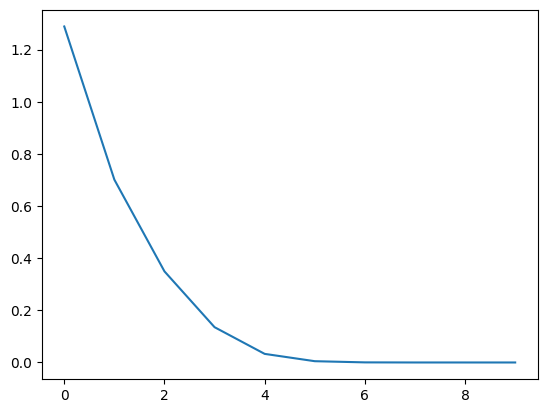

In [80]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()